<a href="https://colab.research.google.com/github/CaptaiN785/DL-Notebooks/blob/main/Pizza-Icecream-classification/ice_creame_and_pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Dataset link***

<center>
<a href = "https://www.kaggle.com/code/hemendrasr/pizza-vs-ice-cream-quick-guide" target = "_blank">
<img src = "https://pngimg.com/uploads/ice_cream/ice_cream_PNG20991.png" width = "200" height = "100" >
</a>
</center>

In [3]:
import zipfile
file = zipfile.ZipFile("data.zip")
file.extractall()
file.close()

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [4]:
## Defining directory
train_dir = "train"
val_dir = "valid"
test_dir = "test"

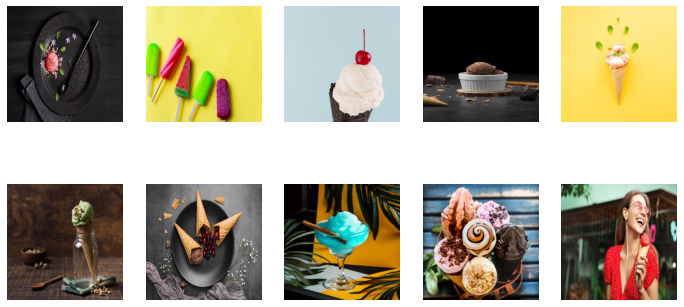

In [18]:
## Plotting the some images from training directory

plt.figure(figsize=(12, 6))
plt.title("Ice-cream")

for i, img in enumerate(os.listdir(os.path.join(train_dir, 'icecream'))[:10]):

    plt.subplot(2, 5, i+1)
    img_path = os.path.join(train_dir, 'icecream')
    plt.imshow(cv.cvtColor(cv.resize(cv.imread(os.path.join(img_path, img)), (256, 256)), cv.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

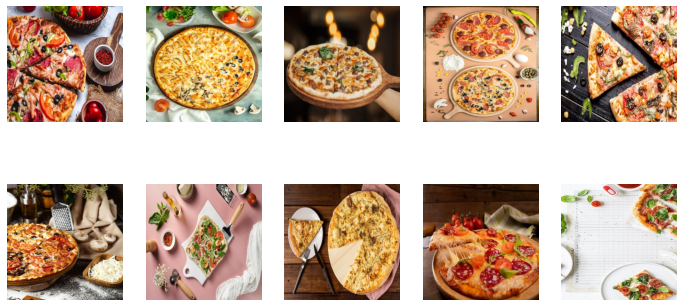

In [19]:

plt.figure(figsize=(12, 6))
plt.title("Pizza")

for i, img in enumerate(os.listdir(os.path.join(train_dir, 'pizza'))[:10]):

    plt.subplot(2, 5, i+1)
    img_path = os.path.join(train_dir, 'pizza')
    plt.imshow(cv.cvtColor(cv.resize(cv.imread(os.path.join(img_path, img)), (256, 256)), cv.COLOR_BGR2RGB))
    plt.axis('off')


In [20]:
## Checking the size of data
def get_size(path):
    p = len(os.listdir(os.path.join(path, 'pizza')))
    i = len(os.listdir(os.path.join(path, 'icecream')))
    return p + i

print("Size of training : ", get_size(train_dir))
print("size of validation : ", get_size(val_dir))
print("size of testing dir : ", get_size(test_dir))

Size of training :  718
size of validation :  208
size of testing dir :  106


In [21]:
## Initializing the image data generator

train_gen = ImageDataGenerator(
    rescale = 1.0/255.0, 
    rotation_range=90,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip = True
)


val_gen = ImageDataGenerator(rescale = 1.0/255.0)

test_gen = ImageDataGenerator(rescale = 1.0/255.0)

In [30]:

## Defining some parameters

batch_size = 64
steps_per_epochs = get_size(train_dir)//batch_size
validation_steps = get_size(val_dir)//batch_size

## training data
train = train_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    class_mode = 'binary',
    batch_size=batch_size
)

## Validation data
validation = val_gen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    class_mode = 'binary',
    batch_size = batch_size
)

## Testing data
test = test_gen.flow_from_directory(
    test_dir,
    target_size = (256, 256),
    class_mode = 'binary',
    batch_size = batch_size
)

Found 718 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [28]:
## Creating the model

model = models.Sequential([
    layers.Conv2D(64, (7, 7), strides=(3, 3), input_shape=(256, 256, 3), activation ='relu'),
    layers.MaxPooling2D((4, 4), strides=(2, 2)),

    layers.Conv2D(128, (5, 5), strides=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((3, 3), strides = (2, 2)),

    layers.Conv2D(256, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 84, 84, 64)        9472      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 41, 41, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 128)       204928    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 256)       

In [33]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
model.fit(train,
          steps_per_epoch=steps_per_epochs,
          validation_data=validation, 
          validation_steps = validation_steps,
          epochs = 30
          )

Epoch 1/30
11/11 [==============================] - 29s 2s/step - loss: 0.6884 - accuracy: 0.5627 - val_loss: 0.6671 - val_accuracy: 0.5260
Epoch 2/30
11/11 [==============================] - 27s 2s/step - loss: 0.6052 - accuracy: 0.6667 - val_loss: 0.4946 - val_accuracy: 0.7656
Epoch 3/30
11/11 [==============================] - 27s 2s/step - loss: 0.4762 - accuracy: 0.7737 - val_loss: 0.4653 - val_accuracy: 0.8073
Epoch 4/30
11/11 [==============================] - 27s 2s/step - loss: 0.5136 - accuracy: 0.7783 - val_loss: 0.7797 - val_accuracy: 0.5104
Epoch 5/30
11/11 [==============================] - 27s 2s/step - loss: 0.5832 - accuracy: 0.7064 - val_loss: 0.4680 - val_accuracy: 0.8438
Epoch 6/30
11/11 [==============================] - 28s 2s/step - loss: 0.4601 - accuracy: 0.8054 - val_loss: 0.3825 - val_accuracy: 0.8333
Epoch 7/30
11/11 [==============================] - 28s 2s/step - loss: 0.4430 - accuracy: 0.8068 - val_loss: 0.3873 - val_accuracy: 0.8542
Epoch 8/30
11/11 [==

In [36]:
loss, acc = model.evaluate(test)

2/2 [==============================] - 1s 224ms/step - loss: 0.1586 - accuracy: 0.9434


In [37]:
print("Test accuracy is : ", acc)

Test accuracy is :  0.9433962106704712


In [39]:
model.save_weights('weight/model_weight.hd5')